In [1]:
import pandas as pd

In [14]:
race_df = pd.read_csv('./csv/cleaned_race_data.csv')
horse_df = pd.read_csv('./csv/cleaned_horse_data.csv',  converters={'owner_id':str})

In [23]:
race_df.head()


,race_id,race_round,race_title,weather,ground_status,date,where_racecourse,total_horse_number,frame_number_first,horse_number_first,...,wide_2_3,umatan,renhuku3,rentan3,is_obstacle,ground_type,is_left_right_straight,distance,weather_rain,weather_snow
0,200808010109,9,初夢ステークス,晴,1,2008-01-05 14:30:00,京都,16,8,15,...,850,3320,2330,13400,0.0,ダ,右,1200,0,0
1,200806010608,8,4歳以上500万下,晴,1,2008-01-20 13:50:00,中山,16,1,1,...,420,9850,5340,0,0.0,ダ,右,1800,0,0
2,200810010208,8,4歳以上500万下,雨,2,2008-01-20 13:40:00,小倉,16,4,8,...,1090,26130,23600,0,0.0,ダ,右,1700,2,0
3,200806010809,9,菜の花賞,晴,1,2008-01-27 14:25:00,中山,16,2,3,...,270,15530,9710,80060,0.0,芝,右,1600,0,0
4,200808010308,8,4歳以上500万下,曇,3,2008-01-12 13:55:00,京都,16,7,14,...,530,2010,2260,0,0.0,芝,右,2200,0,0


In [24]:
race_df.columns

Index(['race_id', 'race_round', 'race_title', 'weather', 'ground_status',
       'date', 'where_racecourse', 'total_horse_number', 'frame_number_first',
       'horse_number_first', 'frame_number_second', 'horse_number_second',
       'frame_number_third', 'horse_number_third', 'tansyo', 'hukusyo_first',
       'hukusyo_second', 'hukusyo_third', 'wakuren', 'umaren', 'wide_1_2',
       'wide_1_3', 'wide_2_3', 'umatan', 'renhuku3', 'rentan3', 'is_obstacle',
       'ground_type', 'is_left_right_straight', 'distance', 'weather_rain',
       'weather_snow'],
      dtype='object')

In [16]:
horse_df.head()

,race_id,rank,frame_number,horse_number,horse_id,horse_name,age,burden_weight,rider_id,goal_time,...,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
0,200808010109,1,8,15,2003106135,レキシントンシチー,5,57.0,666,70.8,...,321800,2008-01-05 14:30:00,0,0,0,1,1200,16.949153,2.0,0.114458
1,200808010109,2,2,3,2003103517,カシノエスケイプ,5,55.0,1111,71.1,...,514009,2008-01-05 14:30:00,0,0,1,0,1200,16.877637,2.0,0.109562
2,200808010109,3,7,13,2003106389,ナリタジューン,5,55.0,945,71.3,...,712800,2008-01-05 14:30:00,0,0,1,0,1200,16.830295,8.0,0.121681
3,200808010109,4,3,6,2001110109,ウォーターバロン,7,57.0,1006,71.4,...,538009,2008-01-05 14:30:00,0,0,0,1,1200,16.806723,-4.0,0.110895
4,200808010109,5,3,5,2000100756,スターオブニルス,8,57.0,1019,71.5,...,972800,2008-01-05 14:30:00,0,0,0,1,1200,16.783217,4.0,0.110895


In [69]:
def get_race_result_with_name(race_df, horse_df, name):
    res = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
    tgt_df = race_df[race_df['race_title'].str.contains(name)]
    for i in tgt_df.race_id:
        res = pd.concat([res, horse_df[horse_df['race_id'] == i]])
    return res
    

In [70]:
arima_df = get_race_result_with_name(race_df, horse_df, '有馬')

In [71]:
arima_df

,race_id,rank,frame_number,horse_number,horse_id,horse_name,age,burden_weight,rider_id,goal_time,...,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
47201,200806050810,1,8,13,2004103198,ダイワスカーレット,4,55.0,945,151.5,...,587008,2008-12-28 15:25:00,0,0,1,0,2500,16.501650,-4.0,0.111336
47202,200806050810,2,8,14,2001103371,アドマイヤモナーク,7,57.0,1088,151.8,...,398002,2008-12-28 15:25:00,0,0,0,1,2500,16.469038,6.0,0.121795
47203,200806050810,3,4,6,2001103061,エアシェイディ,7,57.0,711,151.9,...,84800,2008-12-28 15:25:00,0,0,0,1,2500,16.458196,6.0,0.114919
47204,200806050810,4,7,11,2004102753,ドリームジャーニー,4,57.0,1032,151.9,...,226800,2008-12-28 15:25:00,0,0,0,1,2500,16.458196,10.0,0.132558
47205,200806050810,5,5,8,2004103328,スクリーンヒーロー,4,57.0,5212,152.0,...,758005,2008-12-28 15:25:00,0,0,0,1,2500,16.447368,2.0,0.116803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546342,201806050811,12,5,9,2013103569,リッジマン,5,57.0,663,153.4,...,302800,2018-12-23 15:25:00,0,0,0,1,2500,16.297262,0.0,0.127803
546343,201806050811,13,7,13,2010102459,スマートレイアー,8,55.0,5386,153.5,...,7803,2018-12-23 15:25:00,0,0,1,0,2500,16.286645,-18.0,0.119565
546344,201806050811,14,3,5,2012104503,パフォーマプロミス,6,57.0,5473,153.7,...,226800,2018-12-23 15:25:00,0,0,0,1,2500,16.265452,10.0,0.122845
546345,201806050811,15,1,2,2014100656,クリンチャー,4,57.0,1014,153.8,...,948006,2018-12-23 15:25:00,0,0,0,1,2500,16.254876,0.0,0.116327


In [72]:
top3 = arima_df[arima_df['rank'] <= 3]

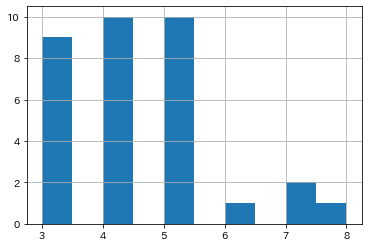

In [74]:
top3.age.hist()

In [89]:
top3[top3['is_mesu'] == 1]

,race_id,rank,frame_number,horse_number,horse_id,horse_name,age,burden_weight,rider_id,goal_time,...,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
47201,200806050810,1,8,13,2004103198,ダイワスカーレット,4,55.0,945,151.5,...,587008,2008-12-28 15:25:00,0,0,1,0,2500,16.501650,-4.0,0.111336
96792,200906050810,2,1,2,2006103319,ブエナビスタ,3,53.0,660,150.1,...,226800,2009-12-27 15:25:00,0,0,1,0,2500,16.655563,-8.0,0.118834
147574,201006050810,2,4,7,2006103319,ブエナビスタ,4,55.0,5271,152.6,...,226800,2010-12-26 15:25:00,0,0,1,0,2500,16.382700,2.0,0.118534
347238,201406040810,1,2,4,2009106253,ジェンティルドンナ,5,55.0,5386,155.3,...,226800,2014-12-28 15:25:00,0,0,1,0,2500,16.097875,-2.0,0.117021
495588,201706050811,2,2,3,2012104105,クイーンズリング,5,55.0,5339,153.8,...,310007,2017-12-24 15:25:00,0,0,1,0,2500,16.254876,0.0,0.116034


In [90]:
top3[top3['is_osu'] == 1]

,race_id,rank,frame_number,horse_number,horse_id,horse_name,age,burden_weight,rider_id,goal_time,...,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
47202,200806050810,2,8,14,2001103371,アドマイヤモナーク,7,57.0,1088,151.8,...,398002,2008-12-28 15:25:00,0,0,0,1,2500,16.469038,6.0,0.121795
47203,200806050810,3,4,6,2001103061,エアシェイディ,7,57.0,711,151.9,...,84800,2008-12-28 15:25:00,0,0,0,1,2500,16.458196,6.0,0.114919
96791,200906050810,1,5,9,2004102753,ドリームジャーニー,5,57.0,1032,150.0,...,226800,2009-12-27 15:25:00,0,0,0,1,2500,16.666667,4.0,0.133803
96793,200906050810,3,3,6,2001103061,エアシェイディ,8,57.0,711,150.8,...,84800,2009-12-27 15:25:00,0,0,0,1,2500,16.578249,0.0,0.115385
147573,201006050810,1,1,1,2007102923,ヴィクトワールピサ,3,55.0,5212,152.6,...,297002,2010-12-26 15:25:00,0,0,0,1,2500,16.382700,2.0,0.107422
147575,201006050810,3,6,11,2007103265,トゥザグローリー,3,55.0,5416,152.6,...,486800,2010-12-26 15:25:00,0,0,0,1,2500,16.382700,-4.0,0.104962
196835,201106050810,1,6,9,2008102636,オルフェーヴル,3,55.0,1032,156.0,...,226800,2011-12-25 15:25:00,0,0,0,1,2500,16.025641,-4.0,0.119048
196836,201106050810,2,4,5,2007102951,エイシンフラッシュ,4,57.0,5339,156.1,...,951005,2011-12-25 15:25:00,0,0,0,1,2500,16.015375,-4.0,0.116803
196837,201106050810,3,5,7,2007103265,トゥザグローリー,4,57.0,1014,156.1,...,486800,2011-12-25 15:25:00,0,0,0,1,2500,16.015375,12.0,0.106343
247801,201206050810,1,7,13,2009102739,ゴールドシップ,3,55.0,422,151.9,...,517002,2012-12-23 15:25:00,0,0,0,1,2500,16.458196,6.0,0.108696
